<a href="https://www.kaggle.com/code/martaseidler/starbucks?scriptVersionId=161190526" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Load libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
starbucks = pd.read_csv("../input/starbucks/starbucks.csv")
starbucks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


## A quick look at the data

In [3]:
starbucks.shape

(242, 18)

In [4]:
starbucks.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [5]:
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

array([[<Axes: title={'center': 'Calories'}>,
        <Axes: title={'center': 'Trans Fat (g) '}>,
        <Axes: title={'center': 'Saturated Fat (g)'}>],
       [<Axes: title={'center': ' Sodium (mg)'}>,
        <Axes: title={'center': ' Total Carbohydrates (g) '}>,
        <Axes: title={'center': 'Cholesterol (mg)'}>],
       [<Axes: title={'center': ' Dietary Fibre (g)'}>,
        <Axes: title={'center': ' Sugars (g)'}>,
        <Axes: title={'center': ' Protein (g) '}>]], dtype=object)

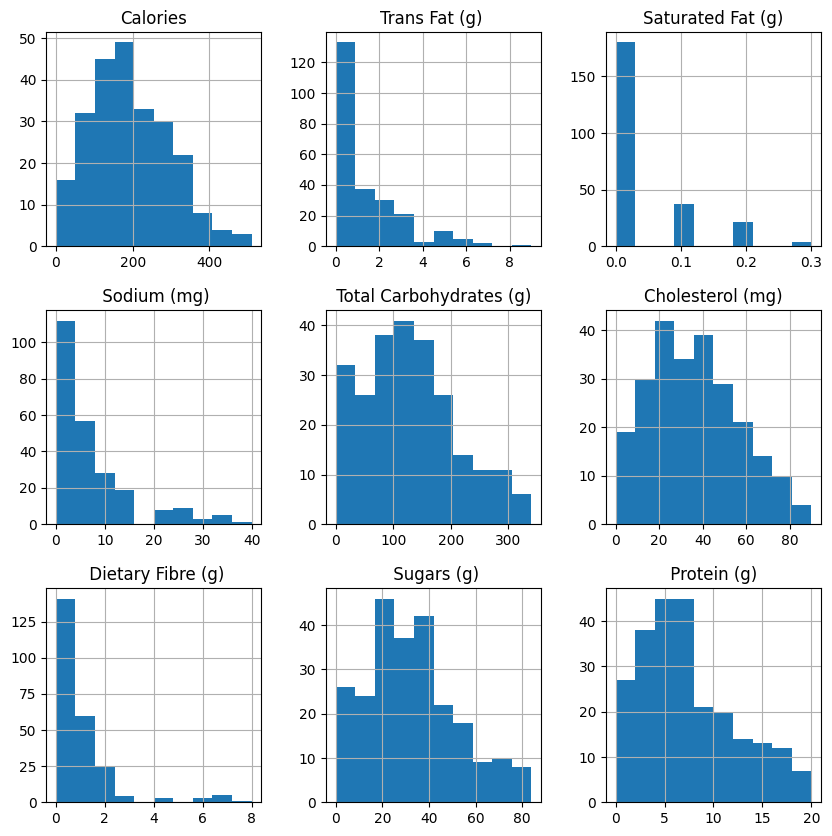

In [6]:
starbucks.hist(figsize=(10,10))

In [7]:
starbucks.describe(include=['O'])

,Beverage_category,Beverage,Beverage_prep,Total Fat (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
count,242,242,242,242,242,242,242,242,241
unique,9,33,13,24,11,10,14,18,36
top,Classic Espresso Drinks,Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),Soymilk,0.1,10%,0%,10%,0%,75
freq,58,12,66,34,43,188,51,99,37


In [8]:
starbucks['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [9]:
starbucks['Beverage'].unique()

array(['Brewed Coffee', 'Caffè Latte',
       'Caffè Mocha (Without Whipped Cream)',
       'Vanilla Latte (Or Other Flavoured Latte)', 'Caffè Americano',
       'Cappuccino', 'Espresso', 'Skinny Latte (Any Flavour)',
       'Caramel Macchiato',
       'White Chocolate Mocha (Without Whipped Cream)',
       'Hot Chocolate (Without Whipped Cream)',
       'Caramel Apple Spice (Without Whipped Cream)', 'Tazo® Tea',
       'Tazo® Chai Tea Latte', 'Tazo® Green Tea Latte',
       'Tazo® Full-Leaf Tea Latte',
       'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)',
       'Iced Brewed Coffee (With Classic Syrup)',
       'Iced Brewed Coffee (With Milk & Classic Syrup)',
       'Shaken Iced Tazo® Tea (With Classic Syrup)',
       'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)',
       'Banana Chocolate Smoothie', 'Orange Mango Banana Smoothie',
       'Strawberry Banana Smoothie', 'Coffee',
       'Mocha (Without Whipped Cream)', 'Caramel (Without Whipped Cream)',
       'Java Chip (Wi

## Data preprocessing

### Change column names

In [10]:
starbucks.columns = starbucks.columns.str.replace(' ', '')

In [11]:
starbucks.columns = starbucks.columns.str.replace('(%DV)', '_percent_DV')
starbucks.columns = starbucks.columns.str.replace('(g)', '_g')
starbucks.columns = starbucks.columns.str.replace('(mg)', '_mg')

In [12]:
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Beverage_category     242 non-null    object 
 1   Beverage              242 non-null    object 
 2   Beverage_prep         242 non-null    object 
 3   Calories              242 non-null    int64  
 4   TotalFat_g            242 non-null    object 
 5   TransFat_g            242 non-null    float64
 6   SaturatedFat_g        242 non-null    float64
 7   Sodium_mg             242 non-null    int64  
 8   TotalCarbohydrates_g  242 non-null    int64  
 9   Cholesterol_mg        242 non-null    int64  
 10  DietaryFibre_g        242 non-null    int64  
 11  Sugars_g              242 non-null    int64  
 12  Protein_g             242 non-null    float64
 13  VitaminA_percent_DV   242 non-null    object 
 14  VitaminC_percent_DV   242 non-null    object 
 15  Calcium_percent_DV    2

### repair column Total Fat

In [13]:
starbucks['TotalFat_g'] = pd.to_numeric(starbucks['TotalFat_g'], errors='coerce')

In [14]:
starbucks.loc[starbucks['TotalFat_g'].isnull() == True]

,Beverage_category,Beverage,Beverage_prep,Calories,TotalFat_g,TransFat_g,SaturatedFat_g,Sodium_mg,TotalCarbohydrates_g,Cholesterol_mg,DietaryFibre_g,Sugars_g,Protein_g,VitaminA_percent_DV,VitaminC_percent_DV,Calcium_percent_DV,Iron_percent_DV,Caffeine_mg
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,NaN,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0


In [15]:
starbucks.loc[237, 'TotalFat_g'] = 3.2

In [16]:
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Beverage_category     242 non-null    object 
 1   Beverage              242 non-null    object 
 2   Beverage_prep         242 non-null    object 
 3   Calories              242 non-null    int64  
 4   TotalFat_g            242 non-null    float64
 5   TransFat_g            242 non-null    float64
 6   SaturatedFat_g        242 non-null    float64
 7   Sodium_mg             242 non-null    int64  
 8   TotalCarbohydrates_g  242 non-null    int64  
 9   Cholesterol_mg        242 non-null    int64  
 10  DietaryFibre_g        242 non-null    int64  
 11  Sugars_g              242 non-null    int64  
 12  Protein_g             242 non-null    float64
 13  VitaminA_percent_DV   242 non-null    object 
 14  VitaminC_percent_DV   242 non-null    object 
 15  Calcium_percent_DV    2

### repair column Caffeine

In [17]:
starbucks.loc[starbucks['Caffeine_mg'].isnull() == True]

,Beverage_category,Beverage,Beverage_prep,Calories,TotalFat_g,TransFat_g,SaturatedFat_g,Sodium_mg,TotalCarbohydrates_g,Cholesterol_mg,DietaryFibre_g,Sugars_g,Protein_g,VitaminA_percent_DV,VitaminC_percent_DV,Calcium_percent_DV,Iron_percent_DV,Caffeine_mg
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1.0,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,NaN


In [18]:
starbucks.loc[range(155, 160)]

,Beverage_category,Beverage,Beverage_prep,Calories,TotalFat_g,TransFat_g,SaturatedFat_g,Sodium_mg,TotalCarbohydrates_g,Cholesterol_mg,DietaryFibre_g,Sugars_g,Protein_g,VitaminA_percent_DV,VitaminC_percent_DV,Calcium_percent_DV,Iron_percent_DV,Caffeine_mg
155,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),Grande,90,0.1,0.0,0.0,0,5,21,0,21,0.3,0%,0%,0%,0%,165
156,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),Venti,130,0.1,0.0,0.0,0,5,31,0,31,0.4,0%,0%,0%,0%,235
157,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Tall Nonfat Milk,80,0.1,0.0,0.0,0,25,18,0,18,2.0,2%,0%,6%,0%,90
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1.0,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,NaN
159,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Soymilk,80,1.0,0.1,0.0,0,20,17,0,17,2.0,2%,0%,6%,0%,90


In [19]:
starbucks.loc[158, 'Caffeine_mg'] = 90

In [20]:
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Beverage_category     242 non-null    object 
 1   Beverage              242 non-null    object 
 2   Beverage_prep         242 non-null    object 
 3   Calories              242 non-null    int64  
 4   TotalFat_g            242 non-null    float64
 5   TransFat_g            242 non-null    float64
 6   SaturatedFat_g        242 non-null    float64
 7   Sodium_mg             242 non-null    int64  
 8   TotalCarbohydrates_g  242 non-null    int64  
 9   Cholesterol_mg        242 non-null    int64  
 10  DietaryFibre_g        242 non-null    int64  
 11  Sugars_g              242 non-null    int64  
 12  Protein_g             242 non-null    float64
 13  VitaminA_percent_DV   242 non-null    object 
 14  VitaminC_percent_DV   242 non-null    object 
 15  Calcium_percent_DV    2

### remove % character from values

In [21]:
starbucks['VitaminA_percent_DV'] = starbucks['VitaminA_percent_DV'].str.replace(r'\W', '', regex=True)
starbucks['VitaminC_percent_DV'] = starbucks['VitaminC_percent_DV'].str.replace(r'\W', '', regex=True)
starbucks['Calcium_percent_DV'] = starbucks['Calcium_percent_DV'].str.replace(r'\W', '', regex=True)
starbucks['Iron_percent_DV'] = starbucks['Iron_percent_DV'].str.replace(r'\W', '', regex=True)

In [22]:
starbucks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,TotalFat_g,TransFat_g,SaturatedFat_g,Sodium_mg,TotalCarbohydrates_g,Cholesterol_mg,DietaryFibre_g,Sugars_g,Protein_g,VitaminA_percent_DV,VitaminC_percent_DV,Calcium_percent_DV,Iron_percent_DV,Caffeine_mg
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0,75


### change columns type from object to int

In [23]:
starbucks['VitaminA_percent_DV'] = starbucks['VitaminA_percent_DV'].astype(str).astype(int)
starbucks['VitaminC_percent_DV'] = starbucks['VitaminC_percent_DV'].astype(str).astype(int)
starbucks['Calcium_percent_DV'] = starbucks['Calcium_percent_DV'].astype(str).astype(int)
starbucks['Iron_percent_DV'] = starbucks['Iron_percent_DV'].astype(str).astype(int)

In [24]:
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Beverage_category     242 non-null    object 
 1   Beverage              242 non-null    object 
 2   Beverage_prep         242 non-null    object 
 3   Calories              242 non-null    int64  
 4   TotalFat_g            242 non-null    float64
 5   TransFat_g            242 non-null    float64
 6   SaturatedFat_g        242 non-null    float64
 7   Sodium_mg             242 non-null    int64  
 8   TotalCarbohydrates_g  242 non-null    int64  
 9   Cholesterol_mg        242 non-null    int64  
 10  DietaryFibre_g        242 non-null    int64  
 11  Sugars_g              242 non-null    int64  
 12  Protein_g             242 non-null    float64
 13  VitaminA_percent_DV   242 non-null    int64  
 14  VitaminC_percent_DV   242 non-null    int64  
 15  Calcium_percent_DV    2

In [25]:
starbucks.loc[starbucks['Caffeine_mg'] == 'varies', 'Caffeine_mg'] = 0

In [26]:
starbucks.loc[starbucks['Caffeine_mg'] == 'Varies', 'Caffeine_mg'] = 0

In [27]:
starbucks['Caffeine_mg'] = starbucks['Caffeine_mg'].astype(str).astype(int)

In [28]:
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Beverage_category     242 non-null    object 
 1   Beverage              242 non-null    object 
 2   Beverage_prep         242 non-null    object 
 3   Calories              242 non-null    int64  
 4   TotalFat_g            242 non-null    float64
 5   TransFat_g            242 non-null    float64
 6   SaturatedFat_g        242 non-null    float64
 7   Sodium_mg             242 non-null    int64  
 8   TotalCarbohydrates_g  242 non-null    int64  
 9   Cholesterol_mg        242 non-null    int64  
 10  DietaryFibre_g        242 non-null    int64  
 11  Sugars_g              242 non-null    int64  
 12  Protein_g             242 non-null    float64
 13  VitaminA_percent_DV   242 non-null    int64  
 14  VitaminC_percent_DV   242 non-null    int64  
 15  Calcium_percent_DV    2

## Data Visualisation

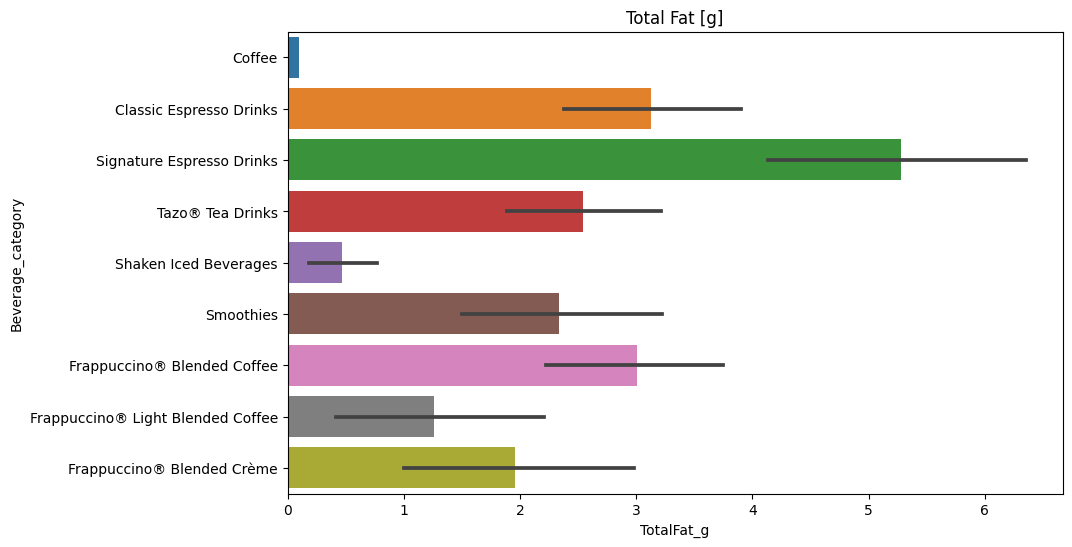

In [29]:
plt.figure(figsize=(10,6))
plt.title("Total Fat [g]")
sns.barplot(x=starbucks['TotalFat_g'], y=starbucks['Beverage_category'])
plt.show()

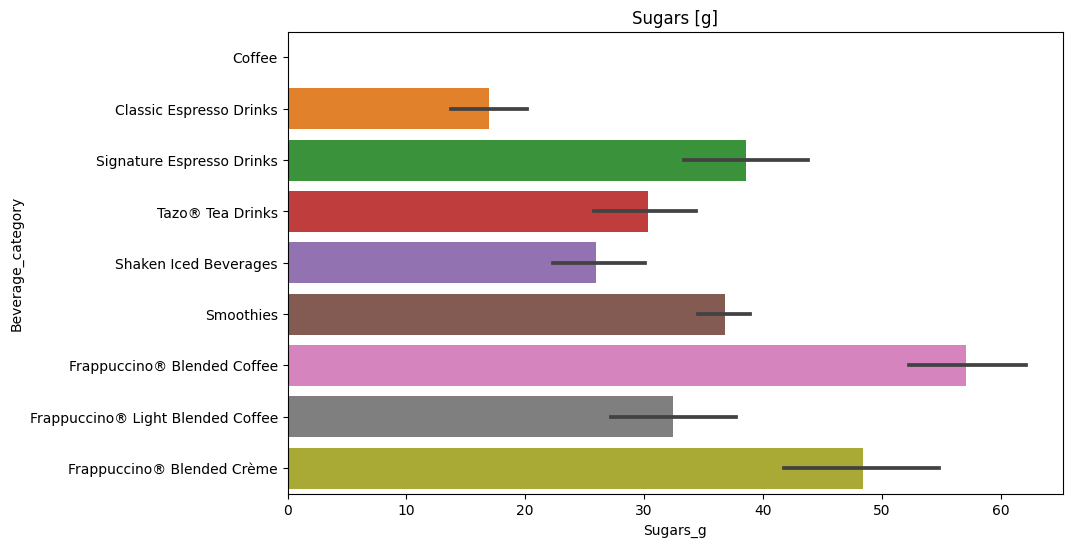

In [30]:
plt.figure(figsize=(10,6))
plt.title("Sugars [g]")
sns.barplot(x=starbucks['Sugars_g'], y=starbucks['Beverage_category'])
plt.show()

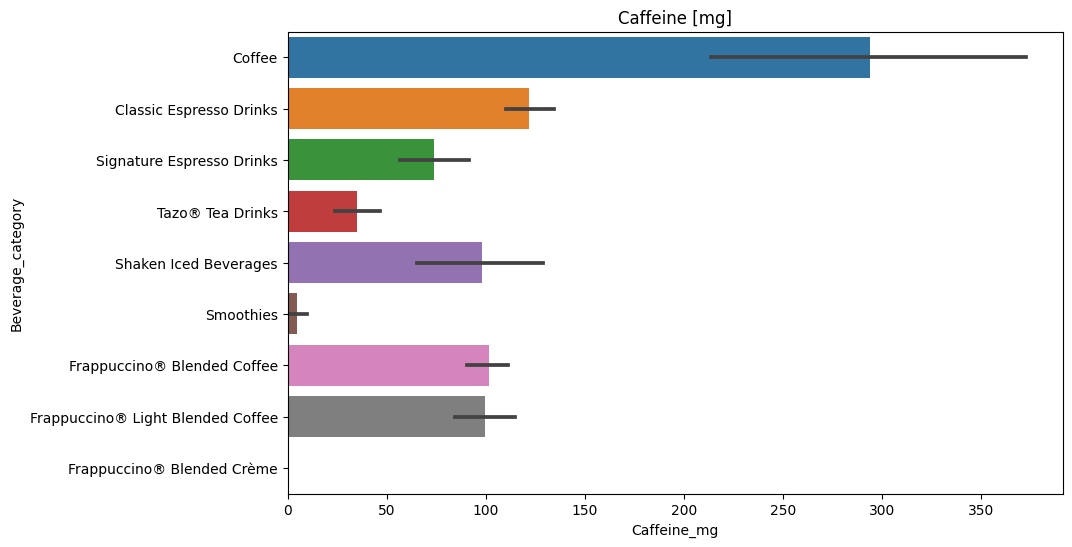

In [31]:
plt.figure(figsize=(10,6))
plt.title("Caffeine [mg]")
sns.barplot(x=starbucks['Caffeine_mg'], y=starbucks['Beverage_category'])
plt.show()

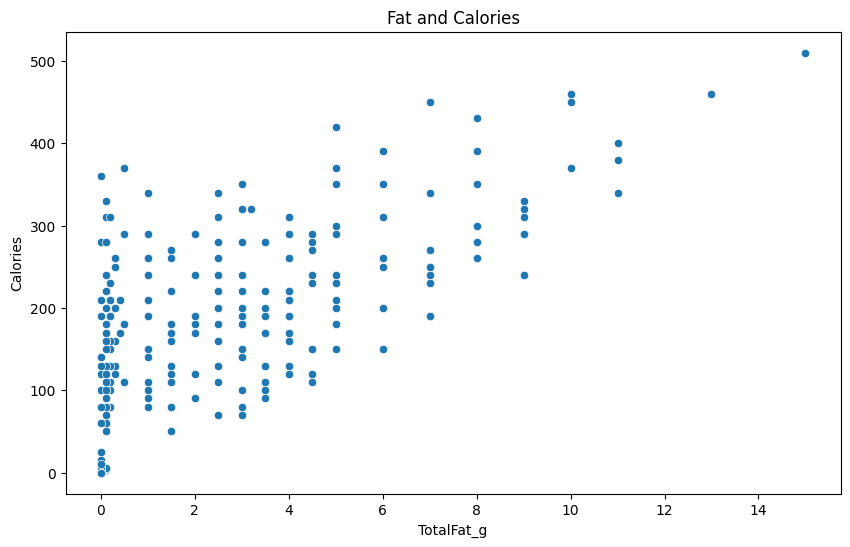

In [32]:
plt.figure(figsize=(10,6))
plt.title("Fat and Calories")
sns.scatterplot(x=starbucks['TotalFat_g'], y=starbucks['Calories'])
plt.show()

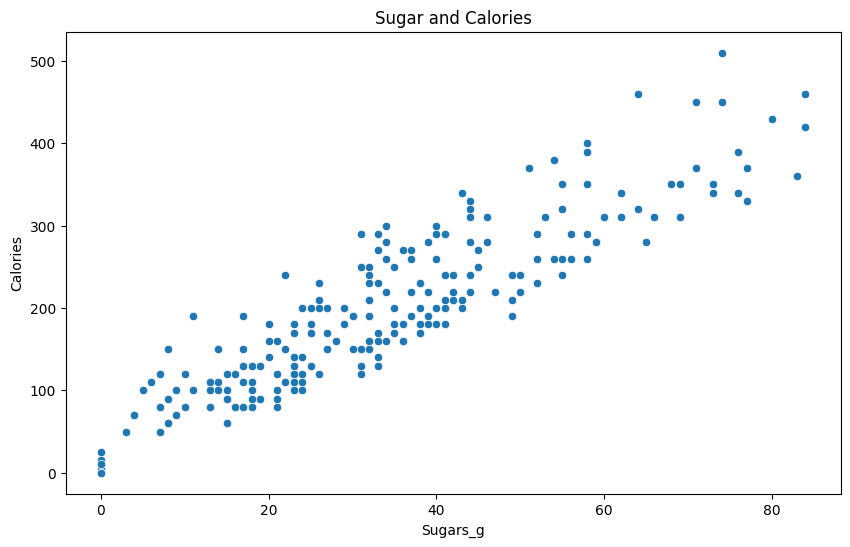

In [33]:
plt.figure(figsize=(10,6))
plt.title("Sugar and Calories")
sns.scatterplot(x=starbucks['Sugars_g'], y=starbucks['Calories'])
plt.show()